# Clustering US Arrests with Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population (%)
- Rape numeric Rape arrests (per 100,000)

We want to cluster the states according to their crıme rates

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [4]:
df.head()

# countries, cities, states by crime,
# students according to their success,
# customers according to the frequency and amount of spending,
# people according to their physical characteristics.
# We can do these operations without domain knowledge to segment.

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


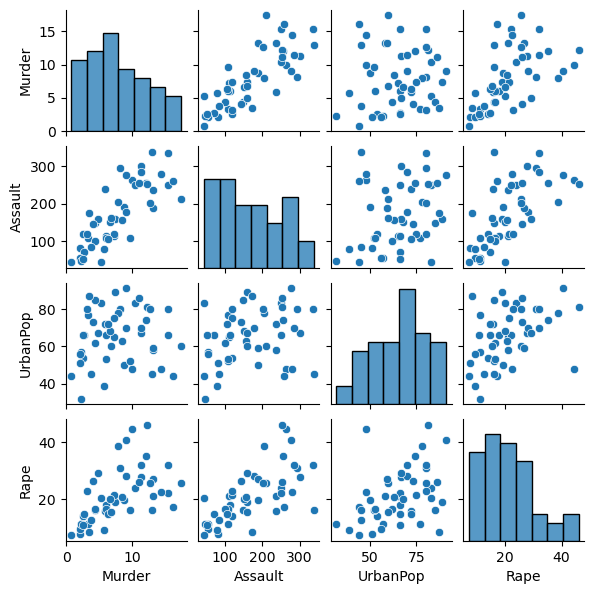

In [7]:
sns.pairplot(df, size=1.5);

# We can't get a clear insight about how many clusters there may be,
# but we evaluate that there may be 2 clusters in some plots.

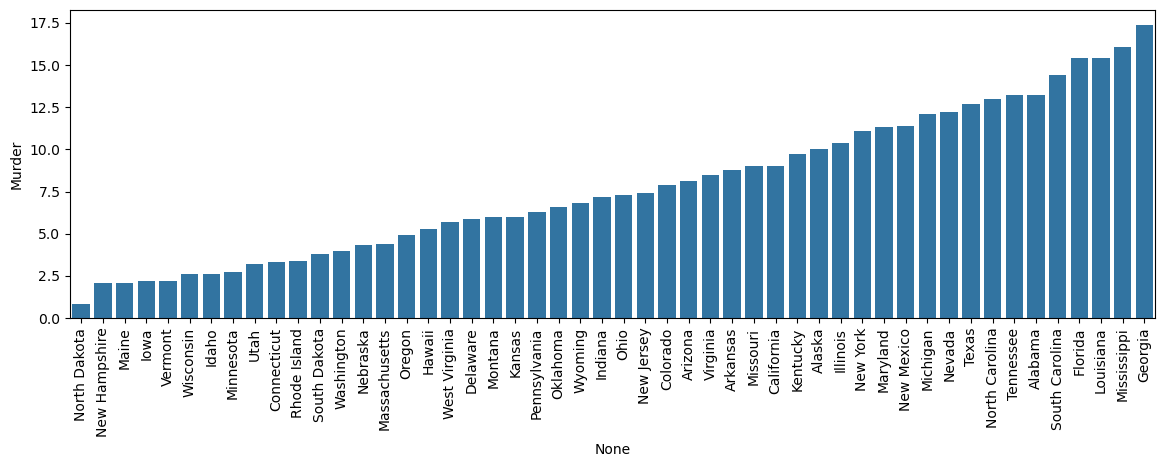

In [8]:
murder = df.Murder.sort_values()

plt.figure(figsize=(14,4))
sns.barplot(x=murder.index,
            y=murder)
plt.xticks(rotation=90);

# sorted by murder crime.

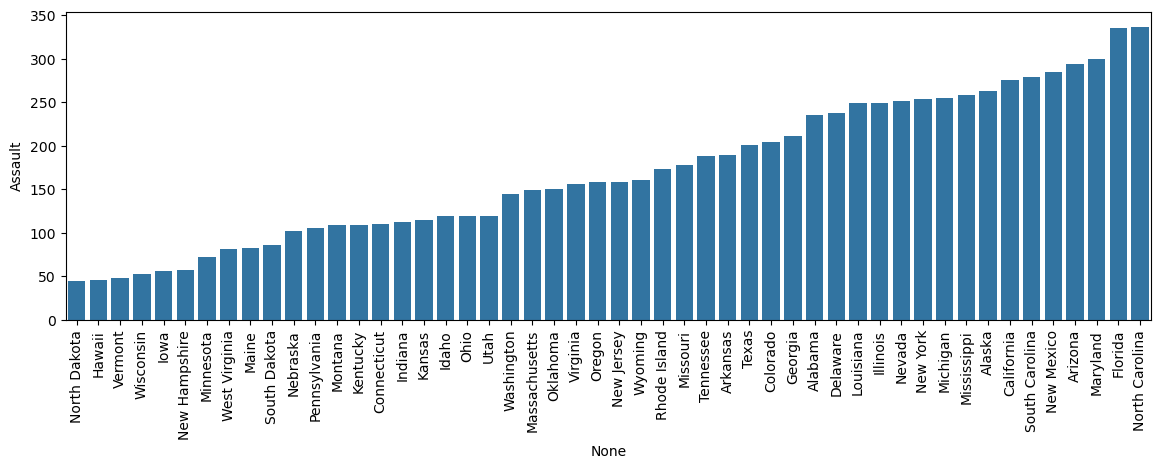

In [9]:
assault = df.Assault.sort_values()

plt.figure(figsize=(14,4))
sns.barplot(x=assault.index,
            y=assault)
plt.xticks(rotation=90);

# Ranking according to physical assault crime.

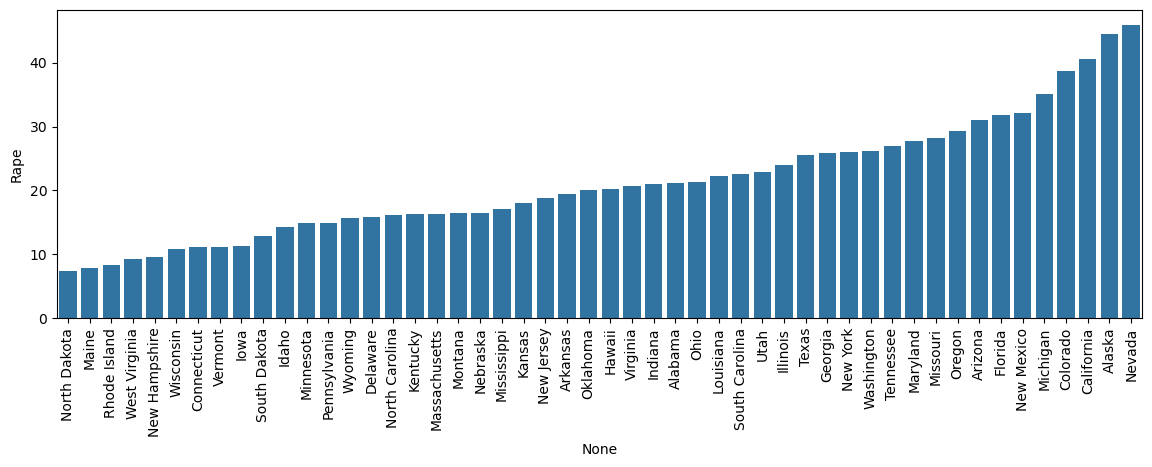

In [10]:
rape = df.Rape.sort_values()

plt.figure(figsize=(14,4))
sns.barplot(x=rape.index,
            y=rape)
plt.xticks(rotation=90);

# Sort by rape/harassment crime.

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 1, the more suitable to have separate clusters.

In [11]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [12]:
hopkins(df, 1)

0.5841914778555474

In [13]:
result=[]
for _ in range(10):
    result.append(hopkins(df, 1))
np.mean(result)

0.578724631656358

In [14]:
# Data has very different mean values so needs scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
df1 = df.copy()
df2 = df.copy()

In [16]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.6202046169241188

In [17]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.611799006510205

In [18]:
scaler = MinMaxScaler()
# According to minmaxscaler and standardscaler, I scalled the data in two different ways,
# but the hopkins tests were close to each other. We can either continue with minmaxscaler or standardscaler.

In [19]:
df_scaled = scaler.fit_transform(df)

In [20]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
dendrogram?

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [23]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

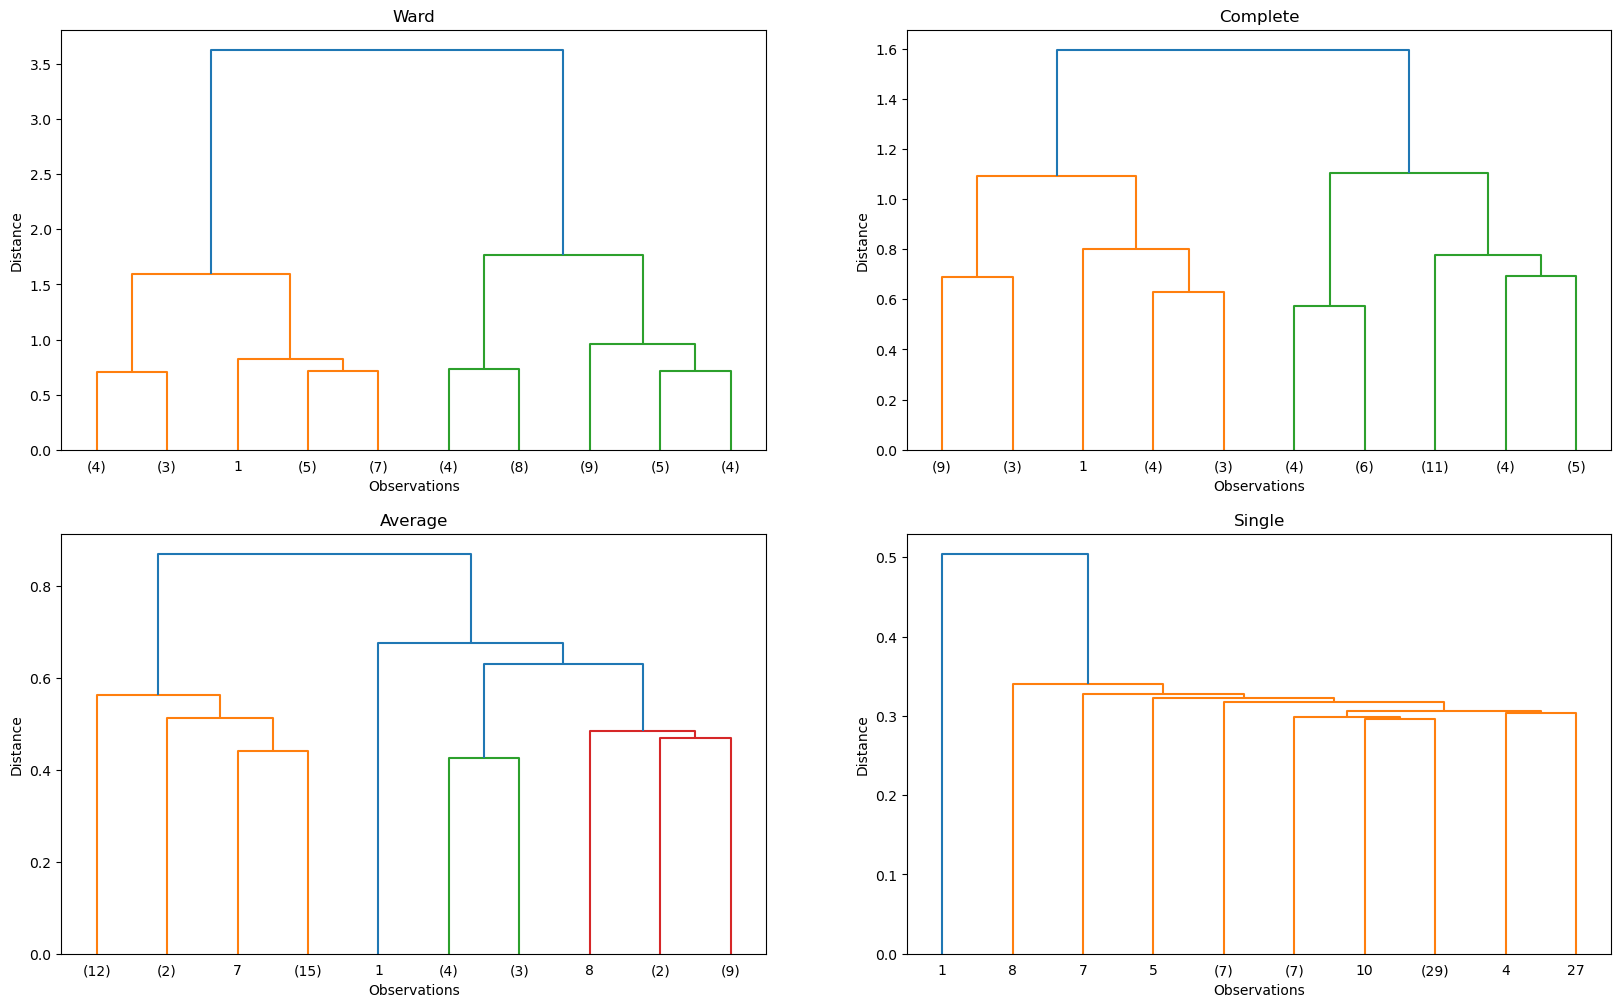

In [24]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [25]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters.
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.42364457559625074
Silhouette Score for 3 clusters: 0.31916915428121284
Silhouette Score for 4 clusters: 0.3298707379986785
Silhouette Score for 5 clusters: 0.28290124293256447
Silhouette Score for 6 clusters: 0.28134198599501803
Silhouette Score for 7 clusters: 0.26010746919769046
Silhouette Score for 8 clusters: 0.23007745711627264
Silhouette Score for 9 clusters: 0.24179562627700718


In [28]:
model = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X)

In [29]:
X["clusters"] = clusters
X.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


<Figure size 2000x1000 with 0 Axes>

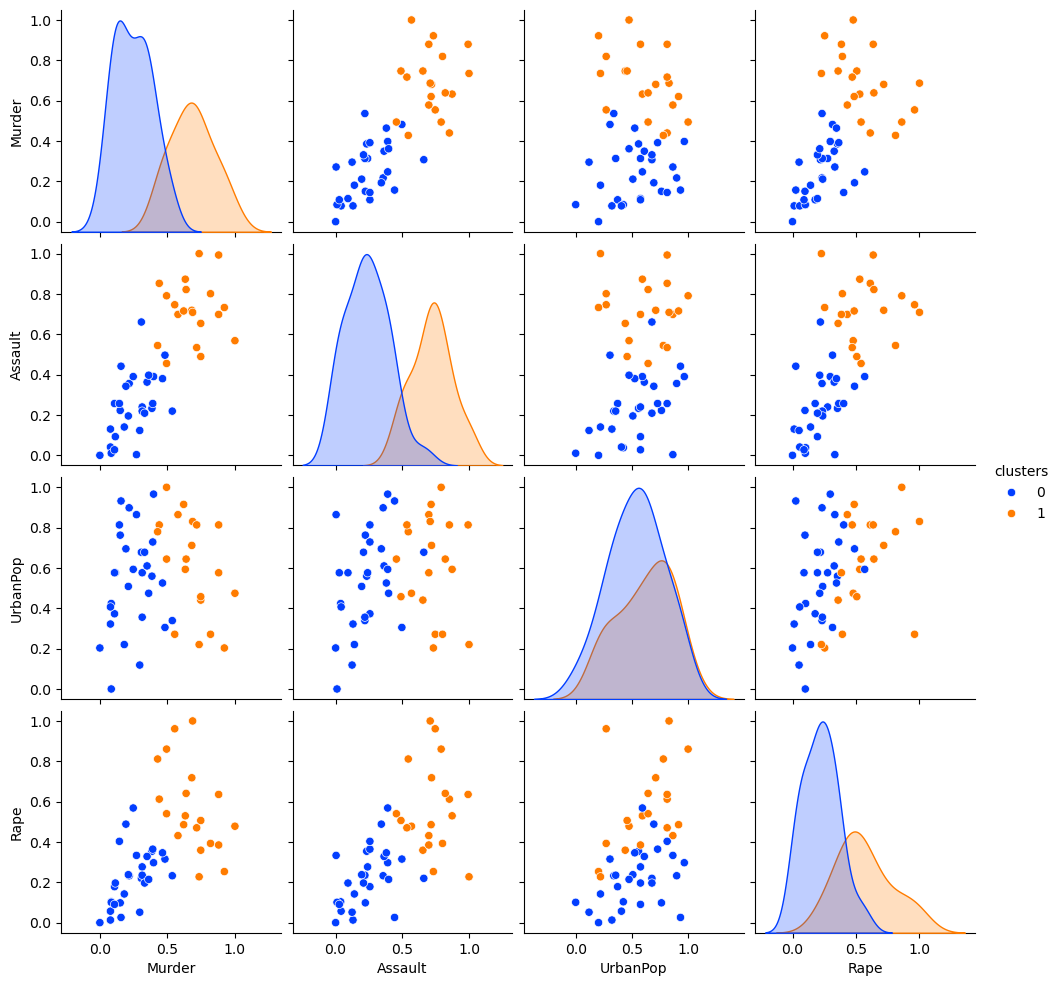

In [30]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X, hue="clusters", palette="bright");
# We see that 2-cluster dıvısıon does not make a good distinction between states according to crime.
# For this reason, we will make 4 clusters and re-examine our visuals as states with less crime and more crime.

In [31]:
import plotly.express as px
fig = px.scatter_3d(X,
                    x='Murder',
                    y='Assault',
                    z='Rape',
                    color='clusters'
                   )
fig.update_coloraxes(showscale=False)
fig.show();

In [32]:
X = pd.DataFrame(df_scaled, columns=df.columns) # Reset the Data to try wıth 4 clusters

In [33]:
model = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X)

# We will observe whether we can make a good distinction over the scatter plot according to the 4 cluster.

In [34]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [35]:
X["clusters"] = clusters
X.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


<Figure size 2000x1000 with 0 Axes>

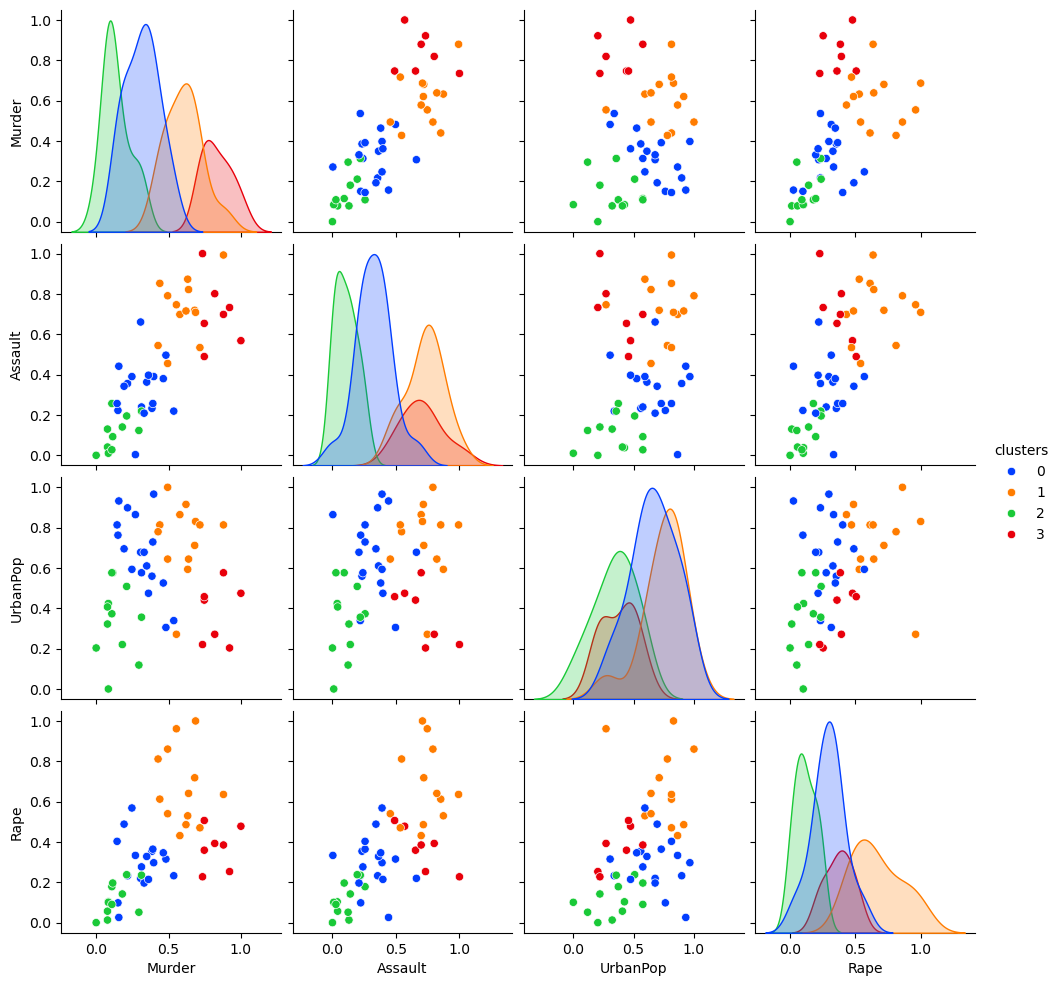

In [36]:
plt.figure(figsize=(20,10))
sns.pairplot(X, hue="clusters", palette="bright");
# When we re-examine the states with less crime and more crime we see that the distinction ıs better wıth 4 clusters so we will continue with 4 clusters.

In [37]:
fig = px.scatter_3d(X,
                    x='Murder',
                    y='Assault',
                    z='Rape',
                    color='clusters')
fig.update_coloraxes(showscale=False)
fig.show();

In [38]:
clus_pred = X.groupby("clusters").mean().T
clus_pred
# For each cluster, we will take the average values of each feature and try to determine whether
# the features are intertwined with each other over these values.

clusters,0,1,2,3
Murder,0.316600,0.603336,0.138052,0.835628
Assault,0.325533,0.727345,0.106164,0.706458
UrbanPop,0.666667,0.745763,0.340395,0.377724
Rape,0.294143,0.669052,0.117140,0.371724


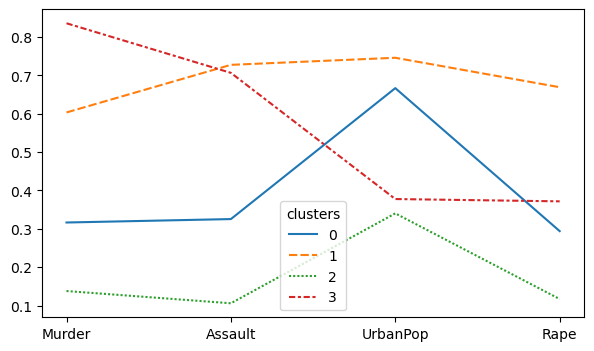

In [39]:
sns.lineplot(data=clus_pred);


# we plot this lineplot to see where the best separation is and in which features my data is intricate.

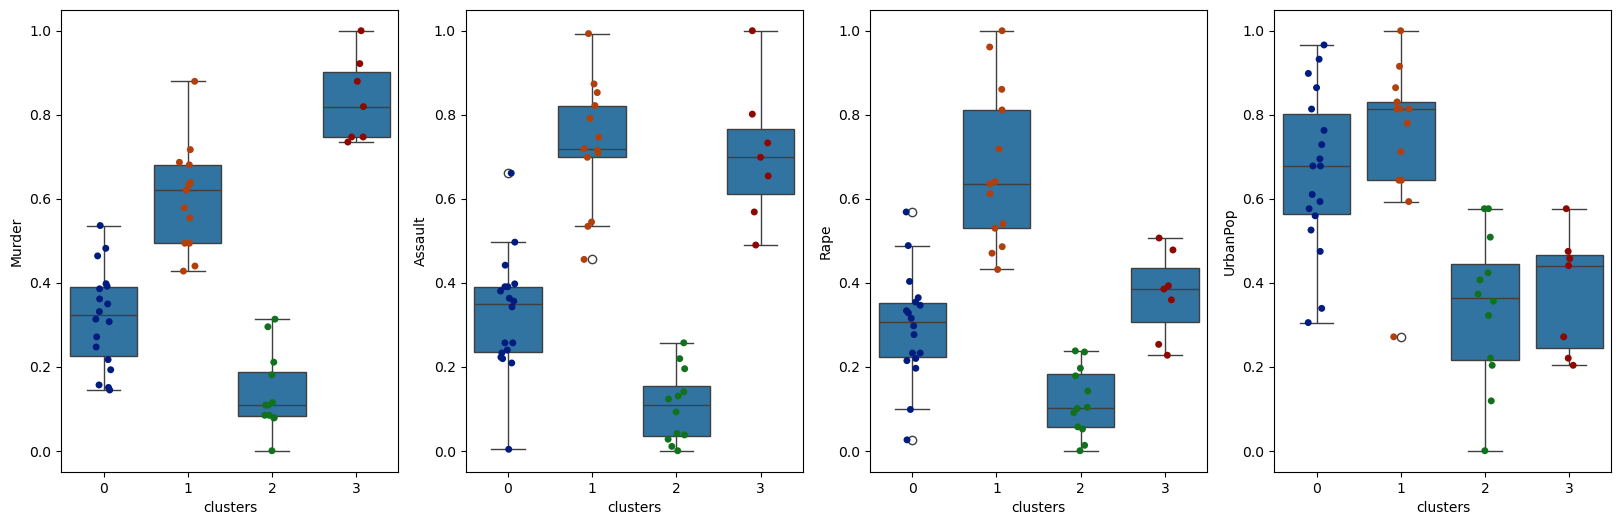

In [40]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y="Murder", x="clusters", data=X)
sns.stripplot(y="Murder", x="clusters", data=X, palette="dark")

plt.subplot(142)
sns.boxplot(y="Assault", x="clusters", data=X)
sns.stripplot(y="Assault", x="clusters", data=X, palette="dark")

plt.subplot(143)
sns.boxplot(y="Rape", x="clusters", data=X)
sns.stripplot(y="Rape", x="clusters", data=X, palette="dark")

plt.subplot(144)
sns.boxplot(y="UrbanPop", x="clusters", data=X)
sns.stripplot(y="UrbanPop", x="clusters", data=X, palette="dark");

# We also check the distribution of clusters for each feature via boxplot and strip plot
# in order to see if the clusters are intricate with each other.
# We will drop the urbanpop feature as we have determined that it is the most intricate feature.

In [41]:
X.clusters.value_counts()

# We should profile this 4 clusters.

clusters
0    18
1    13
2    12
3     7
Name: count, dtype: int64

In [42]:
X2 = X.iloc[:, [0, 1, 3]]
X2.head()
# We ignore urbanpop and regenerate the data.

,Murder,Assault,Rape
0,0.746988,0.654110,0.359173
1,0.554217,0.746575,0.961240
2,0.439759,0.852740,0.612403
3,0.481928,0.496575,0.315245
4,0.493976,0.791096,0.860465


## Hopkins test

In [43]:
result=[]
for _ in range(10):
    result.append(hopkins(X2, 1))
np.mean(result)   # 0.57 with all features

0.653214150783268

In [44]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

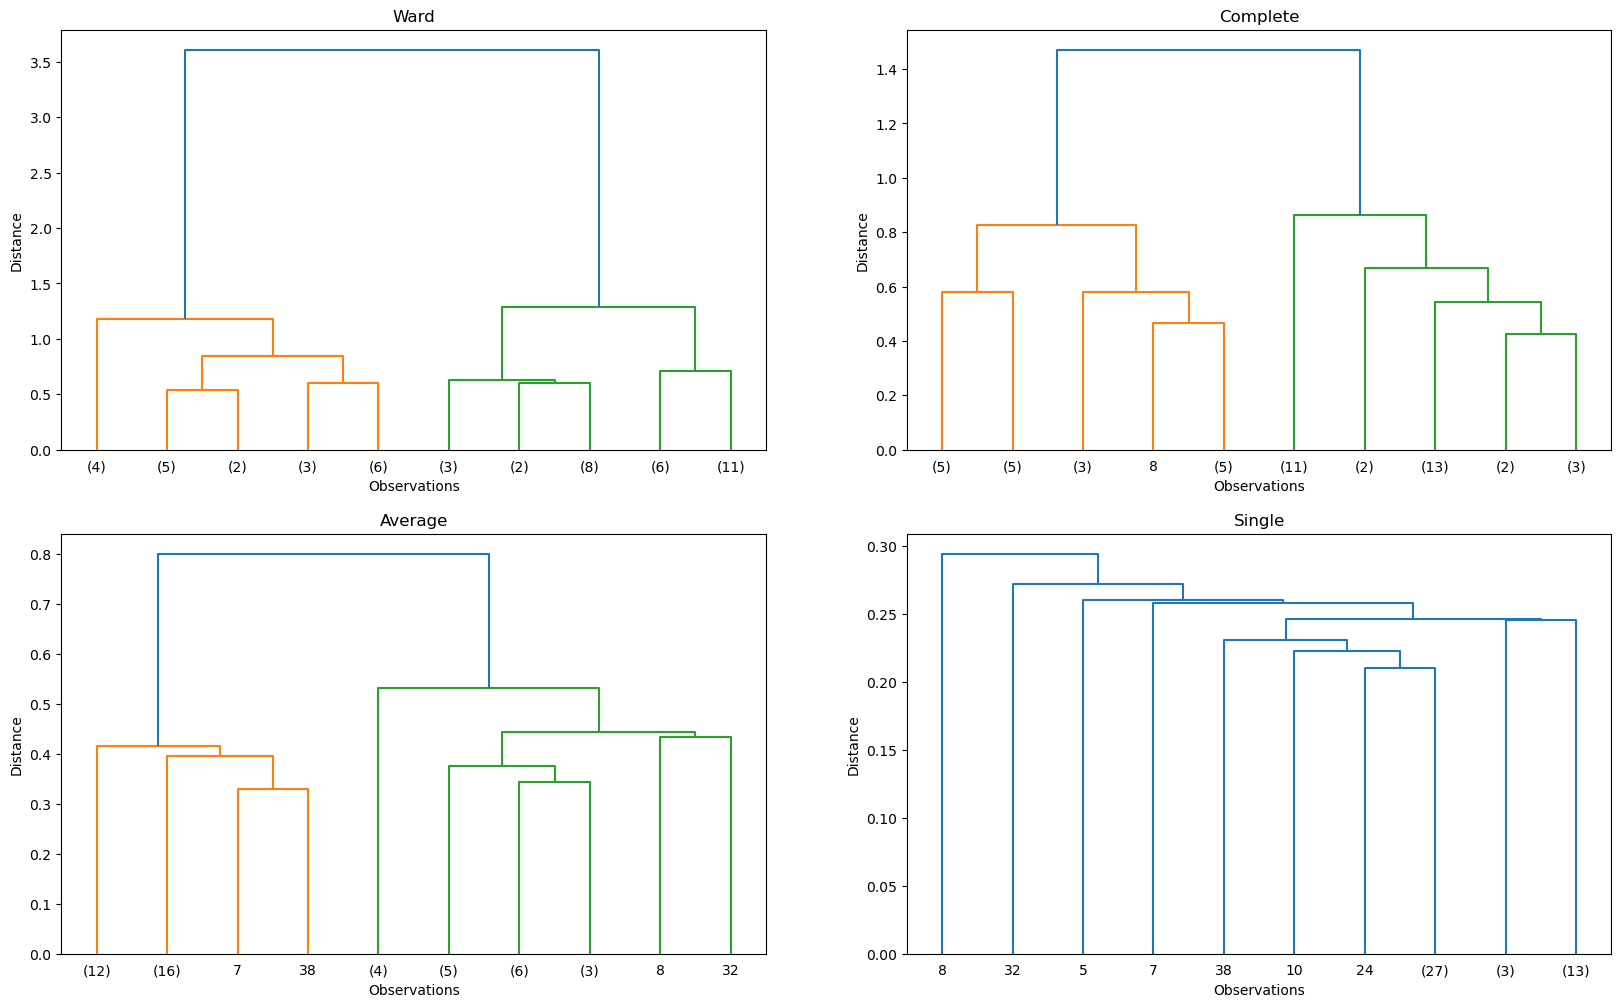

In [45]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, leaf_font_size=10);

In [46]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.5292236374572644
Silhouette Score for 3 clusters: 0.34107037436424575
Silhouette Score for 4 clusters: 0.33426007774452093
Silhouette Score for 5 clusters: 0.30075345717260044
Silhouette Score for 6 clusters: 0.2551392649826249
Silhouette Score for 7 clusters: 0.28780018015625397
Silhouette Score for 8 clusters: 0.30204265966542077
Silhouette Score for 9 clusters: 0.3097011452588473
Silhouette Score for 10 clusters: 0.3175989746439035


In [47]:
final_model = AgglomerativeClustering(n_clusters=4,
                                      affinity="euclidean",
                                      linkage="ward")
clusters = final_model.fit_predict(X2)
X2["clusters"] = clusters
X2.head()

,Murder,Assault,Rape,clusters
0,0.746988,0.654110,0.359173,0
1,0.554217,0.746575,0.961240,3
2,0.439759,0.852740,0.612403,0
3,0.481928,0.496575,0.315245,2
4,0.493976,0.791096,0.860465,3


In [48]:
X2.clusters.value_counts()

clusters
1    17
0    16
2    13
3     4
Name: count, dtype: int64

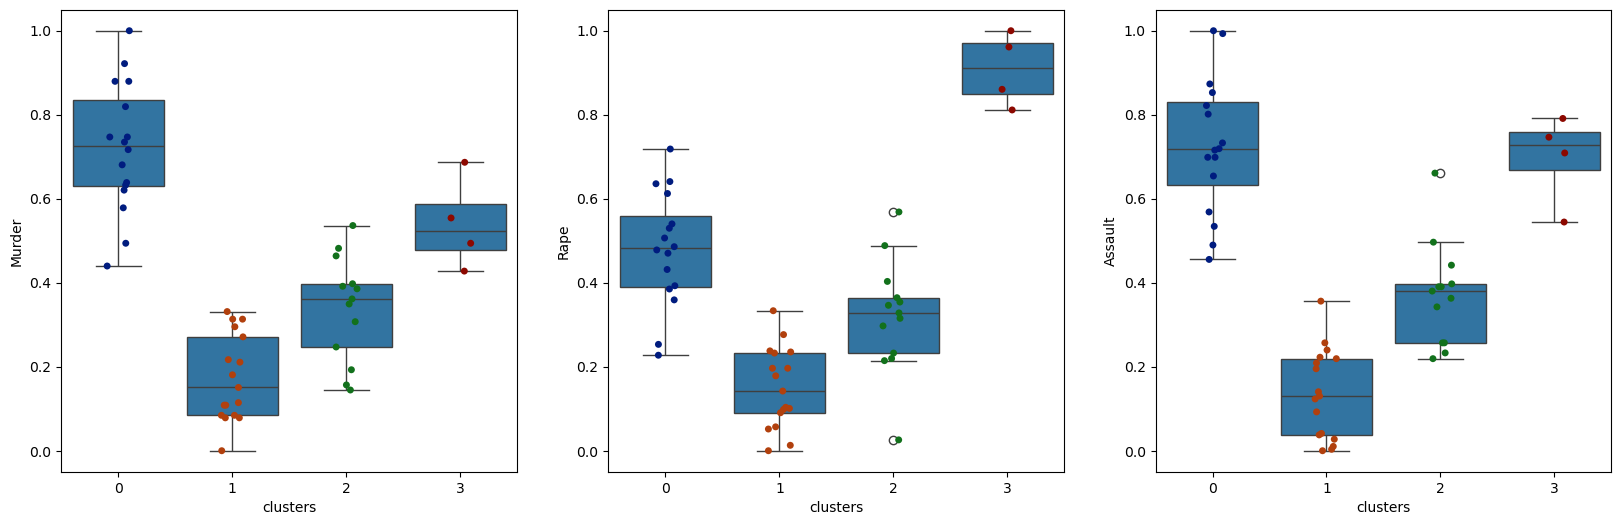

In [49]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Murder", x="clusters", data=X2)
sns.stripplot(y="Murder", x="clusters", data=X2, palette="dark")

plt.subplot(132)
sns.boxplot(y="Rape", x="clusters", data=X2)
sns.stripplot(y="Rape", x="clusters", data=X2, palette="dark")

plt.subplot(133)
sns.boxplot(y="Assault", x="clusters", data=X2)
sns.stripplot(y="Assault", x="clusters", data=X2, palette="dark");


<Figure size 2000x1000 with 0 Axes>

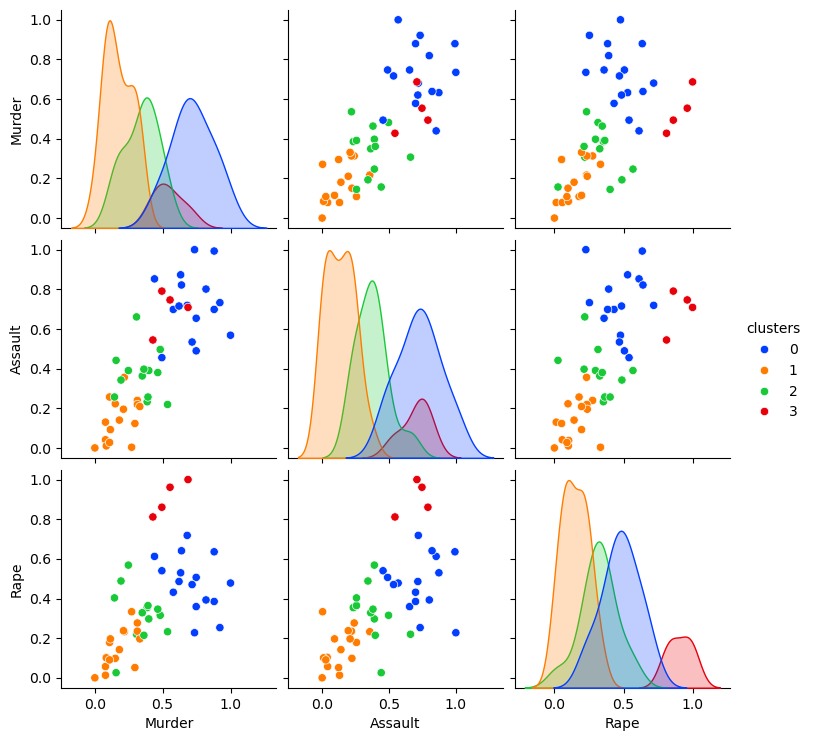

In [50]:
plt.figure(figsize=(20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");

In [51]:
fig = px.scatter_3d(X,
                    x='Murder',
                    y='Assault',
                    z='Rape',
                    color='clusters')
fig.update_coloraxes(showscale=False)
fig.show();

**Evaluation**

- 1 : states with low crime rates
- 2 : states with medium-low crime rates
- 0 : states with medium-high crime rates
- 3 : states with high crime rates

In [52]:
X2["crime_level"] = X2["clusters"].map({
    0: "medium-high",
    1: "low",
    2: "medium-low",
    3: "high"
})
X2.head()

,Murder,Assault,Rape,clusters,crime_level
0,0.746988,0.654110,0.359173,0,medium-high
1,0.554217,0.746575,0.961240,3,high
2,0.439759,0.852740,0.612403,0,medium-high
3,0.481928,0.496575,0.315245,2,medium-low
4,0.493976,0.791096,0.860465,3,high


In [53]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [54]:
X2["States"] = df.index
X2.sample(10)

,Murder,Assault,Rape,clusters,crime_level,States
41,0.746988,0.489726,0.506460,0,medium-high,Tennessee
9,1.000000,0.568493,0.478036,0,medium-high,Georgia
30,0.638554,0.821918,0.640827,0,medium-high,New Mexico
5,0.427711,0.544521,0.811370,3,high,Colorado
49,0.361446,0.397260,0.214470,2,medium-low,Wyoming
44,0.084337,0.010274,0.100775,1,low,Vermont
16,0.536145,0.219178,0.232558,2,medium-low,Kentucky
10,0.271084,0.003425,0.333333,1,low,Hawaii
3,0.481928,0.496575,0.315245,2,medium-low,Arkansas
17,0.879518,0.698630,0.385013,0,medium-high,Louisiana


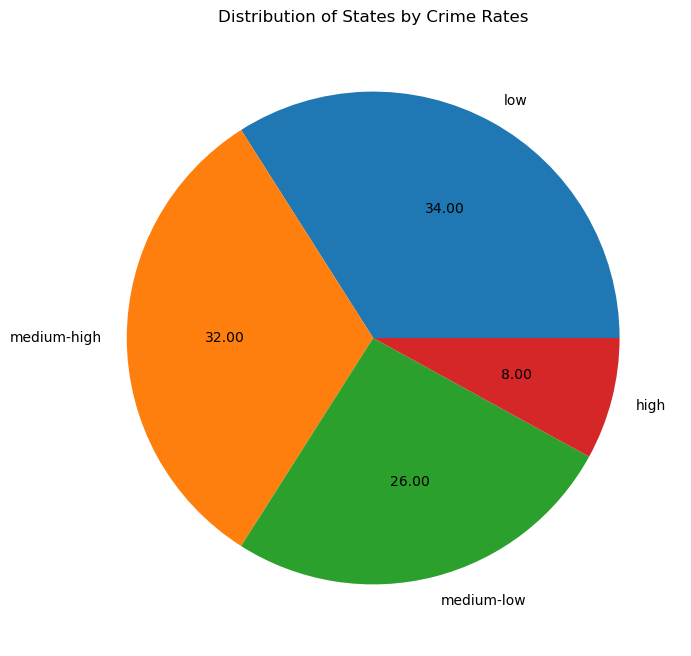

In [55]:
X2["crime_level"].value_counts().plot(kind="pie", autopct='%.2f', figsize=[8,8], label="")
plt.title('Distribution of States by Crime Rates');

In [56]:
X2[X2.crime_level=="low"][["States"]]

,States
6,Connecticut
10,Hawaii
11,Idaho
14,Iowa
15,Kansas
18,Maine
20,Massachusetts
22,Minnesota
25,Montana
26,Nebraska


In [57]:
X2[X2.crime_level=="high"][["States"]]

,States
1,Alaska
4,California
5,Colorado
27,Nevada


In [58]:
X2[X2.crime_level=="medium-low"][["States"]]

,States
3,Arkansas
7,Delaware
13,Indiana
16,Kentucky
29,New Jersey
34,Ohio
35,Oklahoma
36,Oregon
38,Rhode Island
43,Utah


In [59]:
X2[X2.crime_level=="medium-high"][["States"]]

,States
0,Alabama
2,Arizona
8,Florida
9,Georgia
12,Illinois
17,Louisiana
19,Maryland
21,Michigan
23,Mississippi
24,Missouri


END OF THE PROJECT